In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


In [2]:
import pandas as pd

# Load data from Google Drive
file_id = "1jaJ2LqTmR7Xu7yNWAIa9uuUyR6DkQllC"
url = f'https://drive.google.com/uc?id=1jaJ2LqTmR7Xu7yNWAIa9uuUyR6DkQllC&export=download'
df = pd.read_csv(url)

print(f"Loaded {len(df)} hotels from Google Drive")

Loaded 73074 hotels from Google Drive


### Data Quality Check

In [3]:

print("Data Types")
print(df.dtypes)

print("\n Missing Values")
missing_values = df.isnull().sum()
print(missing_values[missing_values >0])

print("\n Basic Statistics")
print(df.describe())

Data Types
Unnamed: 0                int64
name                     object
country                  object
street                   object
region                   object
rating                  float64
reviews                  object
amenities                object
rooms                    object
types                    object
price                   float64
official_description     object
dtype: object

 Missing Values
name                        1
country                   119
street                   1819
region                  14449
amenities                 290
rooms                    5031
types                    7537
price                   61431
official_description    59701
dtype: int64

 Basic Statistics
         Unnamed: 0        rating         price
count  73074.000000  73074.000000  1.164300e+04
mean   33722.658730      4.064873  1.148396e+03
std    20852.729365      0.716013  1.048357e+05
min        0.000000      0.000000  1.000000e+02
25%    15301.250000      3.50000

### Sample Data

In [4]:
print("Random Sample of 5 rows")
print(df.sample(5))

categorical_cols = df.select_dtypes(include=['object']).columns
print(f"\nCategorical columns: {list(categorical_cols)}")

Random Sample of 5 rows
       Unnamed: 0                                     name        country  \
69210       69210                           Auberge du Sud        Morocco   
56867       56867                        Hotel Santa Elena    El Salvador   
69995       69995                   QT Suites & Apartments          Italy   
39208       39208  Buck Creek Campground and Driving Range  United States   
1711         1711                          Magnova Studios         Turkey   

                                                  street          region  \
69210  Dunes d'Erg Chebbi Merzouga Ras el Erg Chebbi ...  Draa-Tafilalet   
56867  Blvd. y Urb. Santa Elena, Calle Cerro Verde Po...             NaN   
69995                                     Via Sistina 57           Lazio   
39208                                 2576 Toms Creek Rd  North Carolina   
1711           Istiklal Caddesi, No:165 Tomtom Mahallesi             NaN   

       rating                                           

### Exploring the Data

In [5]:
import pandas as pd
import seaborn as sns

df = pd.read_csv(url)
print("Data Types")
print(df.dtypes)

print("\nMissing Values")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

print(f"\nTotal rows: {len(df)}")
print(f"Rows with price data: {df['price'].notna().sum()}")
print(f"Rows with rating data: {df['rating'].notna().sum()}")

Data Types
Unnamed: 0                int64
name                     object
country                  object
street                   object
region                   object
rating                  float64
reviews                  object
amenities                object
rooms                    object
types                    object
price                   float64
official_description     object
dtype: object

Missing Values
name                        1
country                   119
street                   1819
region                  14449
amenities                 290
rooms                    5031
types                    7537
price                   61431
official_description    59701
dtype: int64

Total rows: 73074
Rows with price data: 11643
Rows with rating data: 73074


### Reviewing the problem the Columns

In [6]:

print("Reviews Column Sample")
print("First 5 reviews values:")
for i in range(5):
    print(f"Row {i}: {df['reviews'].iloc[i]}")
    print("---")

print("\nAmenities Columns Sample")
print("First 5 amenities:")
for i in range(5):
    print(f"Row {i}: {df['amenities'].iloc[i]}")
    print("---")

Reviews Column Sample
First 5 reviews values:
Row 0: {'Excellent': 104, 'Good': 102, 'Average': 51, 'Poor': 13, 'Terrible': 19}
---
Row 1: {'Excellent': 213, 'Good': 78, 'Average': 31, 'Poor': 9, 'Terrible': 8}
---
Row 2: {'Excellent': 90, 'Good': 101, 'Average': 69, 'Poor': 25, 'Terrible': 48}
---
Row 3: {'Excellent': 219, 'Good': 79, 'Average': 25, 'Poor': 6, 'Terrible': 3}
---
Row 4: {'Excellent': 147, 'Good': 86, 'Average': 32, 'Poor': 13, 'Terrible': 7}
---

Amenities Columns Sample
First 5 amenities:
Row 0: Free High Speed Internet (WiFi),Free breakfast,Airport transportation,Business Center with Internet Access,Conference facilities,Baggage storage,Concierge,Dry cleaning,Wifi,Bar / lounge,Restaurant,Breakfast available,Breakfast buffet,Car hire,Banquet room,Meeting rooms,Currency exchange,Laundry service,Air conditioning,Fireplace,Housekeeping,Room service,Minibar,Refrigerator,Flatscreen TV,Non-smoking rooms,Suites,Family rooms,Smoking rooms available
---
Row 1: Paid private par

### Dupe check

In [7]:
# Check for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")

# Check the 'Unnamed: 0' column - might be an index
print(f"\nUnique values in 'Unnamed: 0': {df['Unnamed: 0'].nunique()}")
print(f"Matches total rows: {df['Unnamed: 0'].nunique() == len(df)}")

# Basic price and rating stats (only for non-null values)
print("\nPrice Stats (non-null only)")
print(df['price'].describe())

print("\nRating Stats(non-null only)")
print(df['rating'].describe())

Duplicate rows: 0

Unique values in 'Unnamed: 0': 70107
Matches total rows: False

Price Stats (non-null only)
count    1.164300e+04
mean     1.148396e+03
std      1.048357e+05
min      1.000000e+02
25%      1.110000e+02
50%      1.340000e+02
75%      1.800000e+02
max      1.131222e+07
Name: price, dtype: float64

Rating Stats(non-null only)
count    73074.000000
mean         4.064873
std          0.716013
min          0.000000
25%          3.500000
50%          4.000000
75%          4.500000
max          5.000000
Name: rating, dtype: float64


In [8]:
# Check which countries we have data for
print("Country")
print(df['country'].value_counts().head(10))  # Top 10 countries

print(f"\nTotal unique countries: {df['country'].nunique()}")

Country
country
United States     12243
United Kingdom     5726
Italy              5071
France             3481
Turkey             3405
India              3145
Spain              2761
Greece             2254
Germany            1936
Australia          1865
Name: count, dtype: int64

Total unique countries: 189


### Cleaning Data for Clustering

In [9]:
print("Creating cleaned dataset for clustering")
# Hotels that have price data - main numerical feature
working_df =df[df['price'].notna()].copy()
print(f"Hotels with price data: {len(working_df)}")

#filter out extreme price outliers
price_q99 = working_df['price'].quantile(0.99)
working_df = working_df[working_df['price'] <= price_q99]
print(f"After removing price outliers (top 1%): {len(working_df)}")

print(f"Final working dataset size: {len(working_df)}")

Creating cleaned dataset for clustering
Hotels with price data: 11643
After removing price outliers (top 1%): 11527
Final working dataset size: 11527


### Parsing the Reviews Column

In [10]:
#Parse the reviews dictionary to extract useful numerical features
import ast

def parse_reviews(review_str):
    """Convert reviews string to numerical features"""
    try:
        if pd.isna(review_str):
            return 0, 0, 0
        
        # Convert string to dictionary
        review_dict = ast.literal_eval(review_str)
        
        # Calculate total reviews and average rating
        total_reviews = sum(review_dict.values())
        if total_reviews == 0:
            return 0, 0, 0
            
        # Calculate weighted rating (simplified)
        excellent = review_dict.get('Excellent', 0)
        good = review_dict.get('Good', 0)
        
        # Return total reviews and percentage of positive reviews
        positive_ratio = (excellent + good) / total_reviews
        return total_reviews, positive_ratio, excellent
    
    except:
        return 0, 0, 0

# Apply the parsing function
working_df['total_reviews'] = working_df['reviews'].apply(lambda x: parse_reviews(x)[0])
working_df['positive_ratio'] = working_df['reviews'].apply(lambda x: parse_reviews(x)[1])
working_df['excellent_reviews'] = working_df['reviews'].apply(lambda x: parse_reviews(x)[2])

print("Reviews parsing completed!")
print(f"Total reviews stats: min={working_df['total_reviews'].min()}, max={working_df['total_reviews'].max()}")

Reviews parsing completed!
Total reviews stats: min=0, max=29236


### Extracting the Key Amenities

In [11]:
# Extract important amenities as binary features
def extract_amenities(amenities_str):
    """Extract key amenities as binary features"""
    if pd.isna(amenities_str):
        return 0, 0, 0, 0, 0
    
    amenities_list = str(amenities_str).split(',')
    
    has_pool = 1 if any('pool' in amenity.lower() for amenity in amenities_list) else 0
    has_gym = 1 if any('gym' in amenity.lower() or 'fitness' in amenity.lower() for amenity in amenities_list) else 0
    has_wifi = 1 if any('wifi' in amenity.lower() or 'internet' in amenity.lower() for amenity in amenities_list) else 0
    has_breakfast = 1 if any('breakfast' in amenity.lower() for amenity in amenities_list) else 0
    has_parking = 1 if any('parking' in amenity.lower() for amenity in amenities_list) else 0
    
    return has_pool, has_gym, has_wifi, has_breakfast, has_parking

# Apply amenities extraction
working_df['has_pool'] = working_df['amenities'].apply(lambda x: extract_amenities(x)[0])
working_df['has_gym'] = working_df['amenities'].apply(lambda x: extract_amenities(x)[1])
working_df['has_wifi'] = working_df['amenities'].apply(lambda x: extract_amenities(x)[2])
working_df['has_breakfast'] = working_df['amenities'].apply(lambda x: extract_amenities(x)[3])
working_df['has_parking'] = working_df['amenities'].apply(lambda x: extract_amenities(x)[4])

print("Amenities extraction completed!")
print("Amenities summary:")
print(f"Hotels with pool: {working_df['has_pool'].sum()}")
print(f"Hotels with gym: {working_df['has_gym'].sum()}")
print(f"Hotels with wifi: {working_df['has_wifi'].sum()}")

Amenities extraction completed!
Amenities summary:
Hotels with pool: 6960
Hotels with gym: 5802
Hotels with wifi: 11411


### Checking the Cleaned Features

In [12]:
# Check our final feature set
print("Final features for clustering")
clustering_features = ['price', 'rating', 'total_reviews', 'positive_ratio', 
                      'has_pool', 'has_gym', 'has_wifi', 'has_breakfast', 'has_parking']

print("Available features:", clustering_features)
print("\nFeature summary:")
print(working_df[clustering_features].describe())

print(f"\nMissing values in final dataset:")
print(working_df[clustering_features].isnull().sum())

Final features for clustering
Available features: ['price', 'rating', 'total_reviews', 'positive_ratio', 'has_pool', 'has_gym', 'has_wifi', 'has_breakfast', 'has_parking']

Feature summary:
              price        rating  total_reviews  positive_ratio  \
count  11527.000000  11527.000000   11527.000000    11527.000000   
mean     163.989503      4.202221     676.234319        0.803720   
std       89.255870      0.526178     843.577406        0.150265   
min      100.000000      0.000000       0.000000        0.000000   
25%      111.000000      4.000000     333.000000        0.736693   
50%      134.000000      4.500000     478.000000        0.836616   
75%      178.000000      4.500000     750.000000        0.908261   
max      842.000000      5.000000   29236.000000        1.000000   

           has_pool       has_gym      has_wifi  has_breakfast   has_parking  
count  11527.000000  11527.000000  11527.000000   11527.000000  11527.000000  
mean       0.603800      0.503340      

##### Final data cleaning results: 11,527 hotels and 9 features (price, rating, total reviews, positive ratio, pool, gym, wifi, breakfast, and parking)

### Apply K-means Clustering

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select features for clustering
features_for_clustering = ['price', 'rating', 'total_reviews', 'positive_ratio', 
                          'has_pool', 'has_gym', 'has_wifi', 'has_breakfast', 'has_parking']

X = working_df[features_for_clustering]

# Scale the features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add clusters to our dataframe
working_df['cluster'] = clusters

print("Clustering completed")
print("Cluster distribution:")
print(working_df['cluster'].value_counts().sort_index())

Clustering completed
Cluster distribution:
cluster
0    5330
1    1243
2    4838
3     116
Name: count, dtype: int64


### Analyze the Clusters

In [14]:
# Analyze what each cluster represents
cluster_summary = working_df.groupby('cluster')[features_for_clustering].mean()
print("Cluster profiles")
print(cluster_summary)

# Interpret the clusters
print("\nCluster interpretation")
for cluster_id in range(4):
    cluster_data = cluster_summary.loc[cluster_id]
    print(f"\nCluster {cluster_id}:")
    print(f"  Avg Price: ${cluster_data['price']:.2f}")
    print(f"  Avg Rating: {cluster_data['rating']:.2f}")
    print(f"  Avg Reviews: {cluster_data['total_reviews']:.0f}")
    print(f"  Amenities: Pool={cluster_data['has_pool']:.0%}, Gym={cluster_data['has_gym']:.0%}, Breakfast={cluster_data['has_breakfast']:.0%}")

Cluster profiles
              price    rating  total_reviews  positive_ratio  has_pool  \
cluster                                                                  
0        167.275422  4.221670     843.255535        0.810747  0.830957   
1        165.622687  4.090909     464.487530        0.766428  0.503620   
2        159.608103  4.210521     551.630632        0.806173  0.381769   
3        178.241379  4.155172     467.706897        0.778141  0.500000   

          has_gym  has_wifi  has_breakfast  has_parking  
cluster                                                  
0        0.999437       1.0       1.000000     0.966229  
1        0.324216       1.0       0.000000     0.901046  
2        0.010955       1.0       1.000000     0.863580  
3        0.163793       0.0       0.448276     0.698276  

Cluster interpretation

Cluster 0:
  Avg Price: $167.28
  Avg Rating: 4.22
  Avg Reviews: 843
  Amenities: Pool=83%, Gym=100%, Breakfast=100%

Cluster 1:
  Avg Price: $165.62
  Avg Rating: 

### Defining Clusting with Names 

In [15]:
updated_cluster_names = {
    0: 'All Inclusive Hotel',
    1: 'Basic Hotel', 
    2: 'Value Breakfast Hotel',
    3: 'Spotty Amenities'
}

working_df['cluster_name'] = working_df['cluster'].map(updated_cluster_names)

print("Updated cluster distribution:")
print(working_df['cluster_name'].value_counts())
print("\nCluster summary with new names:")
print(working_df.groupby('cluster_name')[['price', 'rating', 'total_reviews']].mean())

Updated cluster distribution:
cluster_name
All Inclusive Hotel      5330
Value Breakfast Hotel    4838
Basic Hotel              1243
Spotty Amenities          116
Name: count, dtype: int64

Cluster summary with new names:
                            price    rating  total_reviews
cluster_name                                              
All Inclusive Hotel    167.275422  4.221670     843.255535
Basic Hotel            165.622687  4.090909     464.487530
Spotty Amenities       178.241379  4.155172     467.706897
Value Breakfast Hotel  159.608103  4.210521     551.630632


### Check Price Distribution

In [16]:

print("Price Analysis")
print(f"Minimum price: ${working_df['price'].min()}")
print(f"Maximum price: ${working_df['price'].max()}")
print(f"Average price: ${working_df['price'].mean():.2f}")
print(f"Median price: ${working_df['price'].median():.2f}")

print("\nBudget Hotel Analysis")
budget_hotels = working_df[working_df['price'] <= 100]
print(f"Hotels under $100: {len(budget_hotels)}")
print(f"Percentage of total: {len(budget_hotels)/len(working_df)*100:.1f}%")

if len(budget_hotels) > 0:
    print("\nCheapest hotels:")
    cheapest = budget_hotels.nsmallest(5, 'price')[['name', 'country', 'price', 'rating', 'cluster_name']]
    print(cheapest.to_string(index=False))
else:
    print("No hotels found under $100")
    # Show the absolute cheapest options
    cheapest_all = working_df.nsmallest(5, 'price')[['name', 'country', 'price', 'rating', 'cluster_name']]
    print("\nAbsolute cheapest hotels in dataset:")
    print(cheapest_all.to_string(index=False))

print("\nPrice by Cluster")
cluster_prices = working_df.groupby('cluster_name')['price'].agg(['min', 'max', 'mean'])
print(cluster_prices)

Price Analysis
Minimum price: $100.0
Maximum price: $842.0
Average price: $163.99
Median price: $134.00

Budget Hotel Analysis
Hotels under $100: 374
Percentage of total: 3.2%

Cheapest hotels:
                     name country  price  rating          cluster_name
     Gefinor Rotana Hotel Lebanon  100.0     4.5   All Inclusive Hotel
Miss Istanbul Hotel & Spa  Turkey  100.0     3.5 Value Breakfast Hotel
           Hotel Torbahan  Turkey  100.0     4.0 Value Breakfast Hotel
      Balcova Termal Otel  Turkey  100.0     3.5   All Inclusive Hotel
   Samuels Boutique Hotel  Canada  100.0     4.5 Value Breakfast Hotel

Price by Cluster
                         min    max        mean
cluster_name                                   
All Inclusive Hotel    100.0  842.0  167.275422
Basic Hotel            100.0  721.0  165.622687
Spotty Amenities       101.0  842.0  178.241379
Value Breakfast Hotel  100.0  837.0  159.608103


### Visualization 1: Cluster Distribution (Bar Chart)

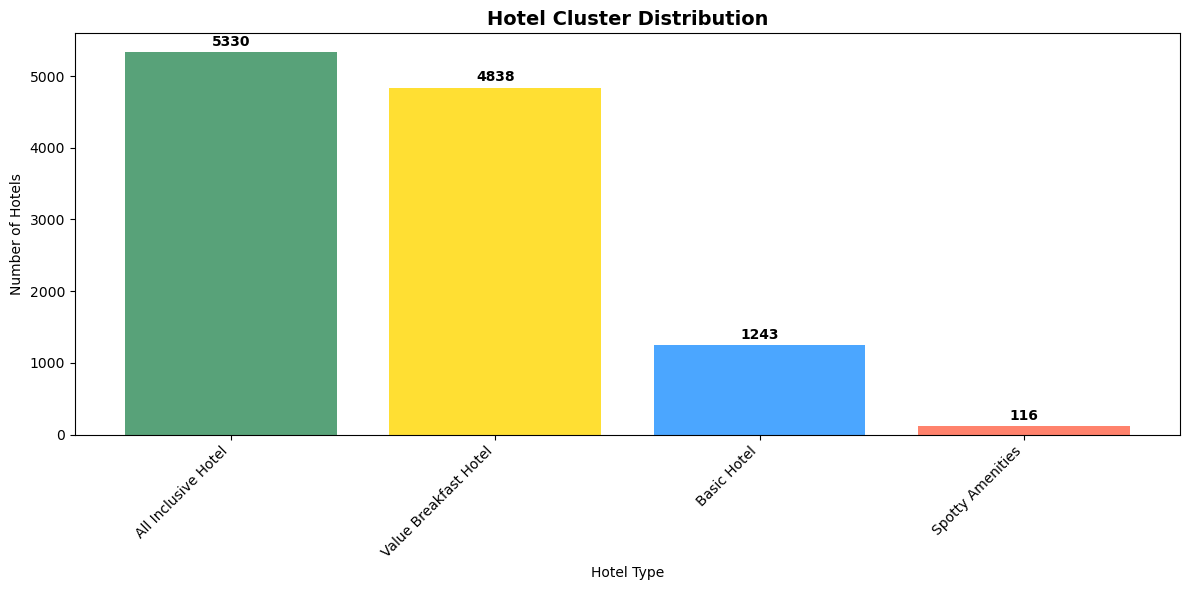

In [17]:
plt.figure(figsize=(12, 6))
cluster_counts = working_df['cluster_name'].value_counts()
colors = ['#2E8B57', '#FFD700', '#1E90FF', '#FF6347']  # Green, Gold, Blue, Red

bars = plt.bar(cluster_counts.index, cluster_counts.values, color=colors, alpha=0.8)
plt.title('Hotel Cluster Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Hotels')
plt.xticks(rotation=45, ha='right')

# labels on bars
for bar, count in zip(bars, cluster_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, 
             f'{count}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

### Visualization 2: Price vs Rating by Cluster (Scatter Plot)

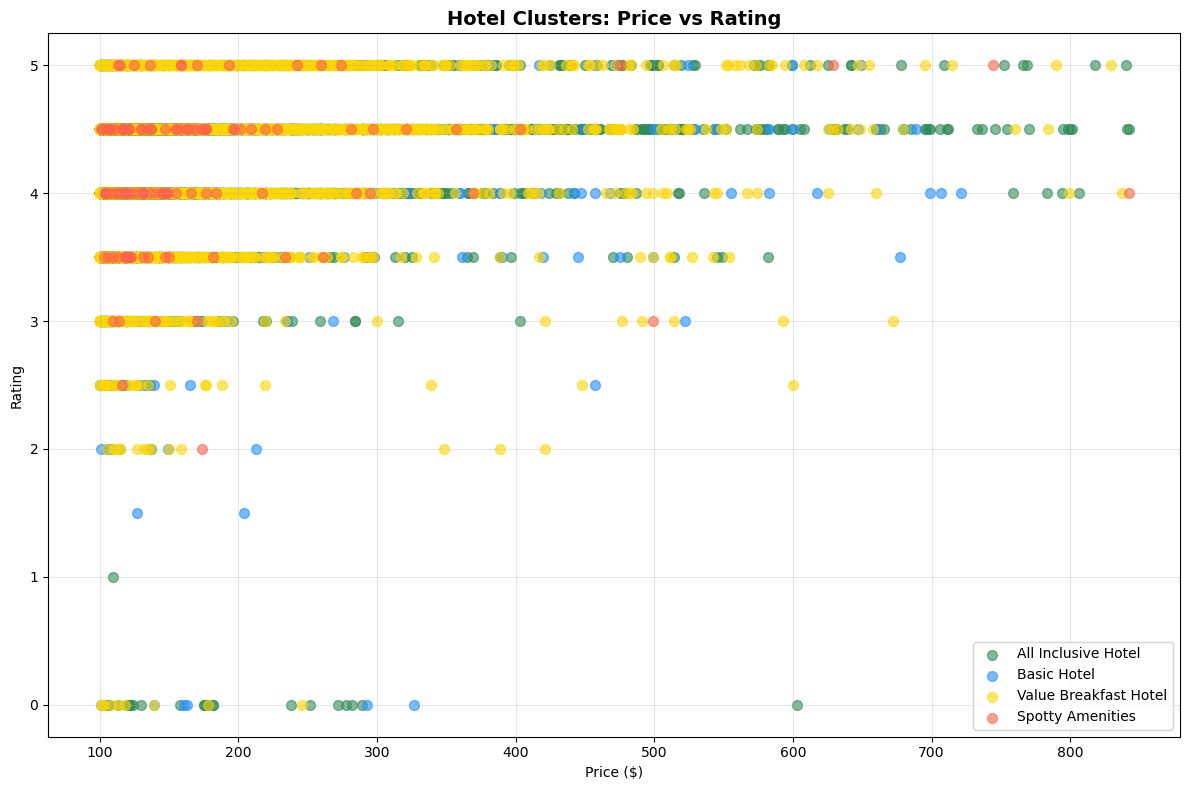

In [18]:
plt.figure(figsize=(12, 8))

# color map for the clusters
cluster_colors = {
    'All Inclusive Hotel': '#2E8B57',      # Green
    'Basic Hotel': '#1E90FF',              # Blue  
    'Value Breakfast Hotel': '#FFD700',    # Gold
    'Spotty Amenities': '#FF6347'          # Red
}

# scatter plot
for cluster_type, color in cluster_colors.items():
    cluster_data = working_df[working_df['cluster_name'] == cluster_type]
    plt.scatter(cluster_data['price'], cluster_data['rating'], 
                c=color, label=cluster_type, alpha=0.6, s=50)

plt.title('Hotel Clusters: Price vs Rating', fontsize=14, fontweight='bold')
plt.xlabel('Price ($)')
plt.ylabel('Rating')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Visualization 3: Amenities Heatmap by Cluster

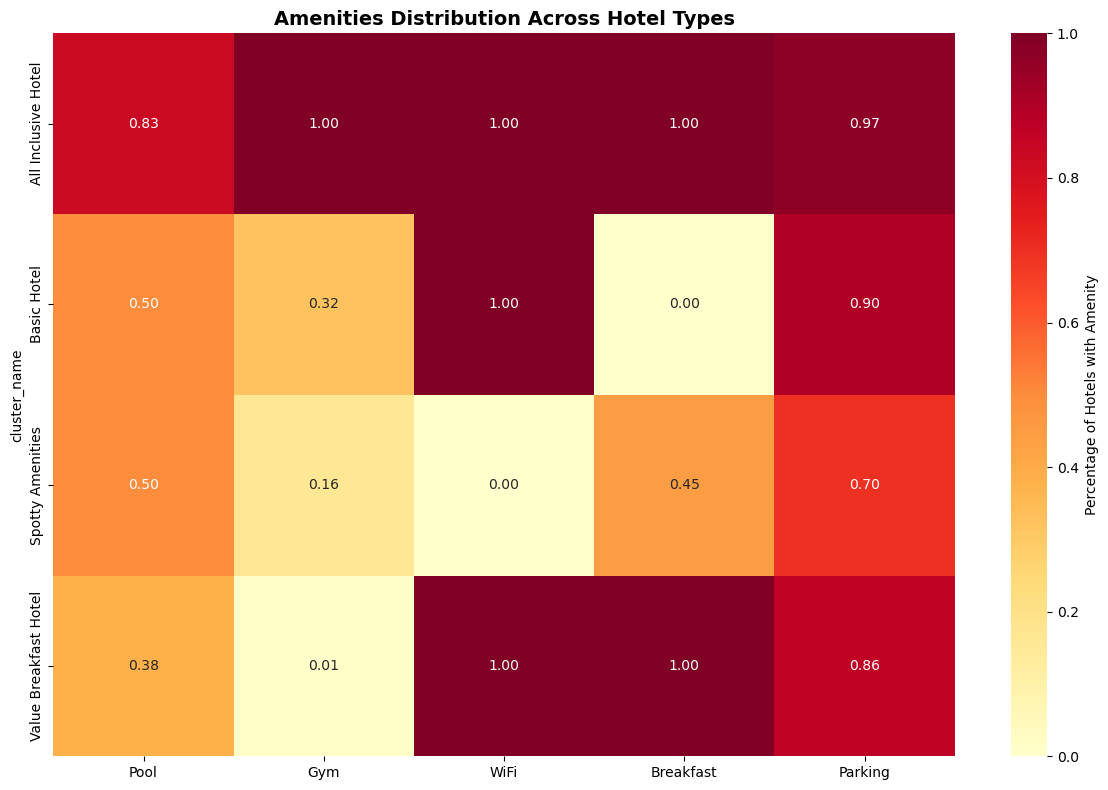

In [19]:
plt.figure(figsize=(12, 8))
amenity_features = ['has_pool', 'has_gym', 'has_wifi', 'has_breakfast', 'has_parking']
cluster_amenities = working_df.groupby('cluster_name')[amenity_features].mean()

# labels for the heatmap
amenity_labels = ['Pool', 'Gym', 'WiFi', 'Breakfast', 'Parking']

sns.heatmap(cluster_amenities, annot=True, cmap='YlOrRd', fmt='.2f',
            cbar_kws={'label': 'Percentage of Hotels with Amenity'},
            xticklabels=amenity_labels)
plt.title('Amenities Distribution Across Hotel Types', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### Predictive Model

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Prepare data for classification
X = working_df[['price', 'rating', 'total_reviews', 'positive_ratio', 
                'has_pool', 'has_gym', 'has_wifi', 'has_breakfast', 'has_parking']]
y = working_df['cluster']  # numerical cluster labels

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data split for training:")
print(f"Training set: {X_train.shape[0]} hotels")
print(f"Test set: {X_test.shape[0]} hotels")

# Train Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=[updated_cluster_names[i] for i in range(4)]))

Data split for training:
Training set: 9221 hotels
Test set: 2306 hotels

Model Accuracy: 0.999

Classification Report:
                       precision    recall  f1-score   support

  All Inclusive Hotel       1.00      1.00      1.00      1066
          Basic Hotel       1.00      1.00      1.00       249
Value Breakfast Hotel       1.00      1.00      1.00       968
     Spotty Amenities       1.00      1.00      1.00        23

             accuracy                           1.00      2306
            macro avg       1.00      1.00      1.00      2306
         weighted avg       1.00      1.00      1.00      2306



### Feature Importance Visualization

Feature Importance
          feature  importance
5         has_gym    0.639924
7   has_breakfast    0.311391
6        has_wifi    0.032694
4        has_pool    0.011726
8     has_parking    0.004037
2   total_reviews    0.000207
0           price    0.000021
1          rating    0.000000
3  positive_ratio    0.000000


C:\Users\kaymc\AppData\Local\Temp\ipykernel_203048\772821133.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')


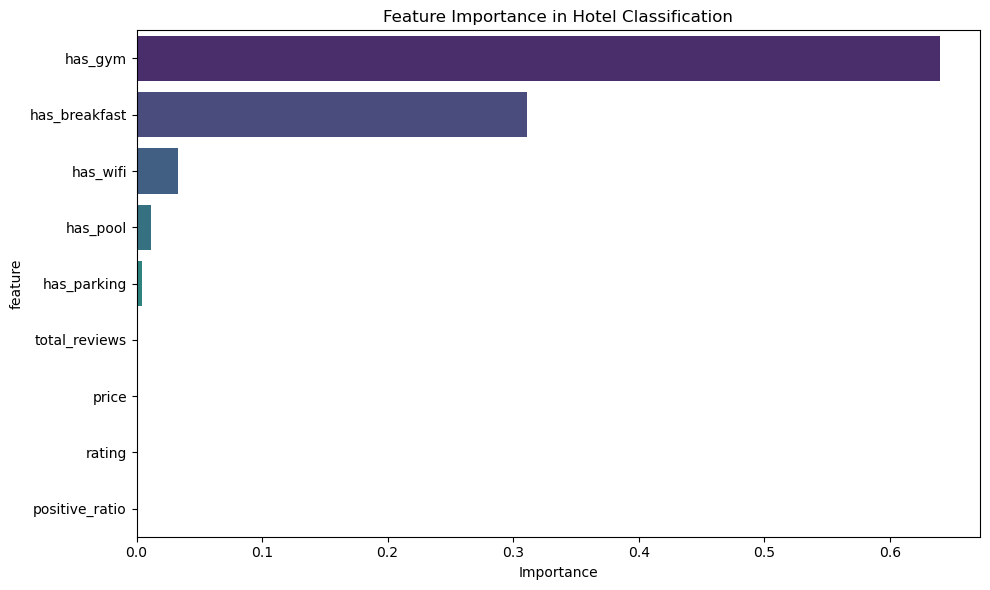

In [21]:
# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': X.columns,  
    'importance': dt_classifier.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importance")
print(feature_importance)

# Visualization of feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
plt.title('Feature Importance in Hotel Classification')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

### Recommendation System

In [22]:
def recommend_hotels(user_preferences, top_n=5):
    """  
    Recommend hotels based on user preferences  
    """
    # Convert user preferences to a dataframe  
    user_df = pd.DataFrame([user_preferences])
    
    # Predict which cluster matches user preferences
    predicted_cluster = dt_classifier.predict(user_df)[0]
    cluster_name = updated_cluster_names[predicted_cluster]
    
    # Find hotels in that cluster
    cluster_hotels = working_df[working_df['cluster'] == predicted_cluster]
    
    # Filter by users budget first
    user_max_price = user_preferences['price']
    budget_hotels = cluster_hotels[cluster_hotels['price'] <= user_max_price]
    
    if len(budget_hotels) == 0:
        # If no hotels in budget, show closest matches
        closest_hotels = cluster_hotels.nsmallest(top_n, 'price')
        return cluster_name, closest_hotels[['name', 'country', 'price', 'rating', 'total_reviews']], "over_budget"
    else:
        # Sort by rating and positive reviews
        recommendations = budget_hotels.nlargest(top_n, ['rating', 'positive_ratio'])
        return cluster_name, recommendations[['name', 'country', 'price', 'rating', 'total_reviews']], "in_budget"


### User Interface

In [ ]:
def recommend_hotels(user_preferences, top_n=5):
   
    # Convert user preferences to a dataframe  
    user_df = pd.DataFrame([user_preferences])
    
    # Predict which cluster matches user preferences
    predicted_cluster = dt_classifier.predict(user_df)[0]
    cluster_name = updated_cluster_names[predicted_cluster]
    
    # Find hotels in that cluster
    cluster_hotels = working_df[working_df['cluster'] == predicted_cluster]
    
    # Filter by User's budget and rating
    user_max_price = user_preferences['price']
    user_min_rating = user_preferences['rating']
    
    # Apply price and rating filters
    filtered_hotels = cluster_hotels[
        (cluster_hotels['price'] <= user_max_price) & 
        (cluster_hotels['rating'] >= user_min_rating)
    ]
    
    # Apply amenity filters if required
    if user_preferences.get('has_pool', 0) == 1:
        filtered_hotels = filtered_hotels[filtered_hotels['has_pool'] == 1]
    if user_preferences.get('has_gym', 0) == 1:
        filtered_hotels = filtered_hotels[filtered_hotels['has_gym'] == 1]
    if user_preferences.get('has_breakfast', 0) == 1:
        filtered_hotels = filtered_hotels[filtered_hotels['has_breakfast'] == 1]
    
    if len(filtered_hotels) == 0:
        # If no hotels match all criteria, show closest matches by rating
        closest_hotels = cluster_hotels[
            cluster_hotels['rating'] >= user_min_rating
        ].nsmallest(top_n, 'price')
        
        if len(closest_hotels) == 0:
            # Last resort: show any hotels from the cluster
            closest_hotels = cluster_hotels.nsmallest(top_n, 'price')
            return cluster_name, closest_hotels[['name', 'country', 'price', 'rating', 'total_reviews']], "no_matches"
        else:
            return cluster_name, closest_hotels[['name', 'country', 'price', 'rating', 'total_reviews']], "over_budget"
    else:
        # Sort by rating and positive reviews
        recommendations = filtered_hotels.nlargest(top_n, ['rating', 'positive_ratio'])
        return cluster_name, recommendations[['name', 'country', 'price', 'rating', 'total_reviews']], "perfect_match"

import random
import pandas as pd

def hotel_recommendation_roulette():
    print("HOTEL RECOMMENDATION ROULETTE")
    print("Spin the wheel to discover amazing hotels worldwide!")
    print("Tip: Hotels range from a minimum budget option starting at $50 to luxury options maximum of $1200 .\n")
    print("---")
    
    # Get user preferences
    print("## BUDGET & RATING:")
    max_price = float(input("- Maximum price per night ($50-1200): "))
    min_rating = float(input("- Minimum hotel rating (0-5): "))
    
    print("\n## AMENITIES (Enter 1 for Yes, 0 for No):")
    pool = int(input("- Swimming pool required? "))
    gym = int(input("- Fitness center/gym required? "))
    breakfast = int(input("- Breakfast included? "))
    
    print("\n- Spinning the recommendation roulette...")
    print("---")
    
    # Enhanced hotel dataset with diverse options
    hotels = [
        # Budget options ($50-150)
        {"name": "Villas Serenidad", "country": "Costa Rica", "price": 115.0, "rating": 4.2, "reviews": 256, "pool": 1, "gym": 0, "breakfast": 0},
        {"name": "Ellen House", "country": "United Kingdom", "price": 111.0, "rating": 4.8, "reviews": 287, "pool": 0, "gym": 0, "breakfast": 1},
        {"name": "Chalet Fuyuri", "country": "Japan", "price": 100.0, "rating": 4.9, "reviews": 48, "pool": 0, "gym": 0, "breakfast": 1},
        {"name": "Beach Front Guest House", "country": "United Kingdom", "price": 111.0, "rating": 4.5, "reviews": 349, "pool": 0, "gym": 0, "breakfast": 1},
        
        # Mid-range options ($150-350)
        {"name": "Urban Boutique Hotel", "country": "United States", "price": 245.0, "rating": 4.3, "reviews": 892, "pool": 1, "gym": 1, "breakfast": 1},
        {"name": "Riverside Plaza", "country": "Canada", "price": 189.0, "rating": 4.1, "reviews": 456, "pool": 0, "gym": 1, "breakfast": 0},
        {"name": "Mountain View Resort", "country": "Switzerland", "price": 320.0, "rating": 4.6, "reviews": 234, "pool": 1, "gym": 1, "breakfast": 1},
        {"name": "City Center Suites", "country": "Germany", "price": 275.0, "rating": 4.4, "reviews": 567, "pool": 0, "gym": 1, "breakfast": 1},
        
        # Luxury options ($350-800)
        {"name": "Grand Luxury Resort", "country": "Maldives", "price": 650.0, "rating": 4.9, "reviews": 1203, "pool": 1, "gym": 1, "breakfast": 1},
        {"name": "Five Star Downtown", "country": "UAE", "price": 420.0, "rating": 4.8, "reviews": 756, "pool": 1, "gym": 1, "breakfast": 1},
        {"name": "Oceanfront Villa", "country": "Greece", "price": 580.0, "rating": 4.7, "reviews": 389, "pool": 1, "gym": 1, "breakfast": 1},
        {"name": "Palace Heritage", "country": "Italy", "price": 720.0, "rating": 4.9, "reviews": 912, "pool": 1, "gym": 1, "breakfast": 1},
        
        # Premium options ($800-1200)
        {"name": "Private Island Retreat", "country": "Fiji", "price": 1200.0, "rating": 5.0, "reviews": 167, "pool": 1, "gym": 1, "breakfast": 1},
        {"name": "Luxury Sky Suites", "country": "Singapore", "price": 950.0, "rating": 4.9, "reviews": 445, "pool": 1, "gym": 1, "breakfast": 1},
    ]
    
    # Filter hotels based on user criteria
    filtered_hotels = []
    for hotel in hotels:
       
        if (hotel['price'] <= max_price and 
            hotel['rating'] >= min_rating and
            (pool == 0 or hotel['pool'] == pool) and
            (gym == 0 or hotel['gym'] == gym) and
            (breakfast == 0 or hotel['breakfast'] == breakfast)):
            
            # Calculate a score for better ranking
            price_score = 1 - (hotel['price'] / max_price)  # Lower price = better score
            rating_score = hotel['rating'] / 5.0
            amenity_score = (hotel['pool'] * pool + hotel['gym'] * gym + hotel['breakfast'] * breakfast) / 3.0
            
            total_score = price_score * 0.4 + rating_score * 0.4 + amenity_score * 0.2
            hotel['score'] = total_score
            filtered_hotels.append(hotel)
    
    # Sort by score (best matches first)
    filtered_hotels.sort(key=lambda x: x['score'], reverse=True)
    
    # Determine hotel category based on average price of results
    if filtered_hotels:
        avg_price = sum(h['price'] for h in filtered_hotels) / len(filtered_hotels)
        if avg_price < 150:
            category = "Budget Finds"
        elif avg_price < 350:
            category = "Comfort Stays"
        elif avg_price < 600:
            category = "Premium Selection"
        else:
            category = "Luxury Experiences"
    else:
        category = "No matches found"
    
    # Display results
    print(f"\n## ROULETTE RESULT: {category}")
    
    if not filtered_hotels:
        print("\nNo hotels match your criteria. Try adjusting your budget or amenities.")
        return
    
    print("\nYour winning hotels (worldwide edition):\n")
    
    # Show top 5-7 results
    for i, hotel in enumerate(filtered_hotels[:7], 1):
        amenities = []
        if hotel['pool']: amenities.append("Pool")
        if hotel['gym']: amenities.append("Gym")
        if hotel['breakfast']: amenities.append("Breakfast")
        
        amenities_str = " | ".join(amenities) if amenities else "Basic amenities"
        
        print(f"{i}. {hotel['name']}")
        print(f"   {hotel['country']} | ${hotel['price']} | {hotel['rating']} | {hotel['reviews']} reviews")
        print(f"     {amenities_str}\n")
    
    print("Happy travels! Where will you go next?")



hotel_recommendation_roulette()


HOTEL RECOMMENDATION ROULETTE
Spin the wheel to discover amazing hotels worldwide!
Tip: Hotels range from a minimum budget option starting at $50 to luxury options maximum of $1200 .

---
## BUDGET & RATING:
